<a href="https://colab.research.google.com/github/chungwonkang/Data-study/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%EC%97%B0%EC%8A%B5(2024_04_14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 결측치 처리

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


결측치 탐색

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

missingno 모듈

In [ ]:
import missingno as msno

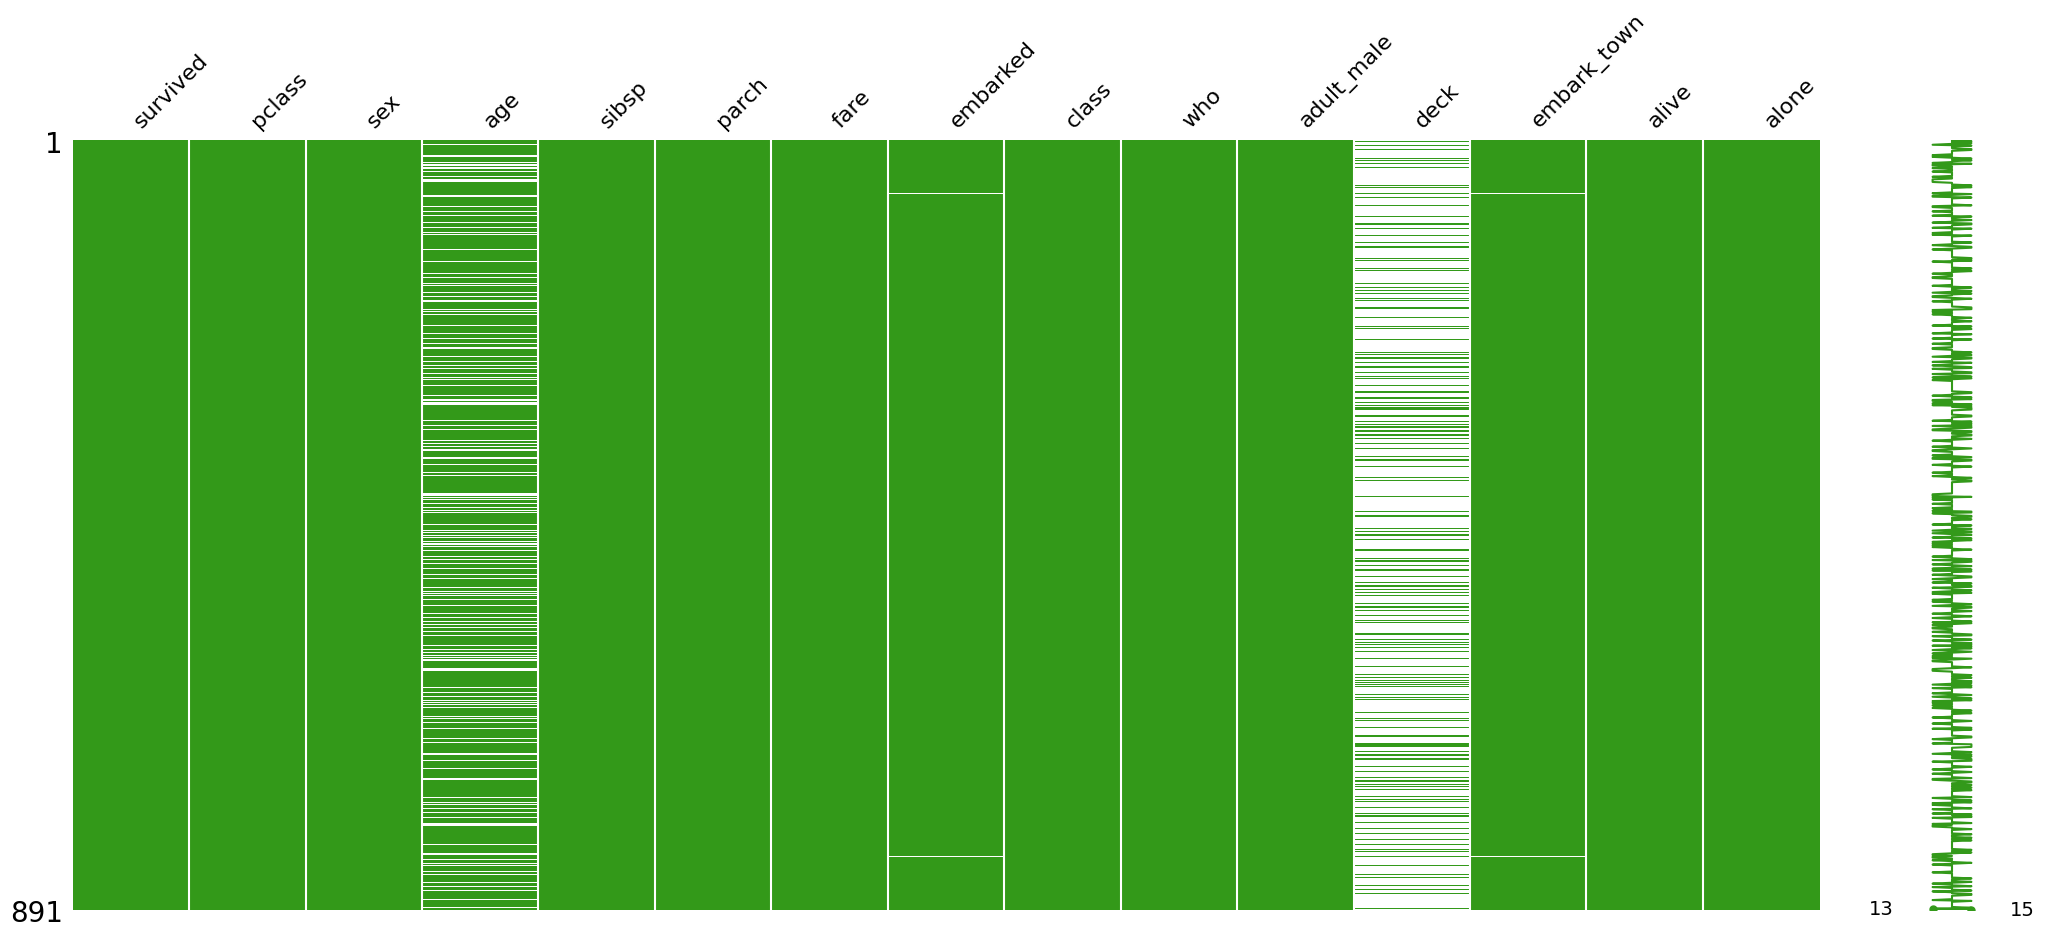

In [ ]:
msno.matrix(titanic, color=(0.2, 0.6, 0.1))
plt.show()

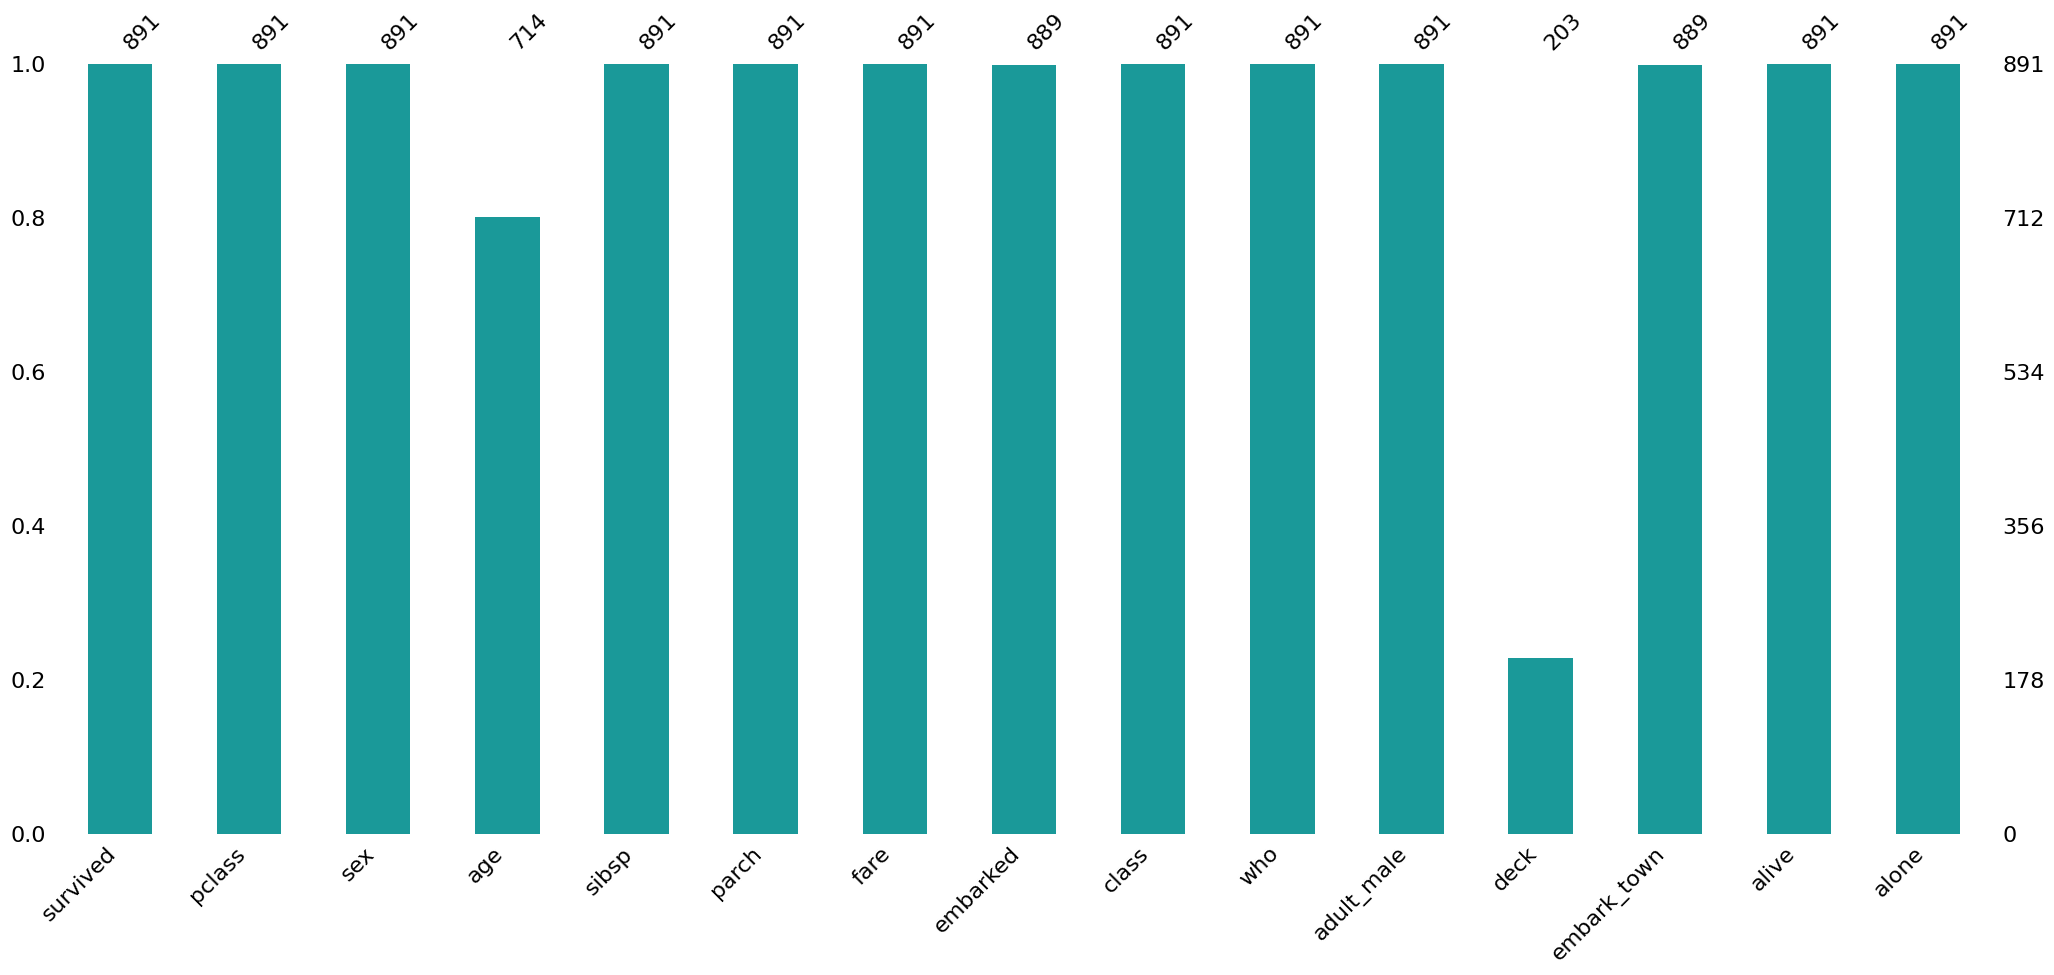

In [ ]:
msno.bar(titanic, color=(0.1, 0.6, 0.6))
plt.show()

결측치 처리

In [ ]:
titanic = titanic.dropna(thresh=int(len(titanic)/2), axis=1)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic = titanic[titanic.embarked.notnull()]
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
titanic = titanic[titanic.embarked.notnull()]
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

<ipython-input-11-a80f7c4355d0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'])


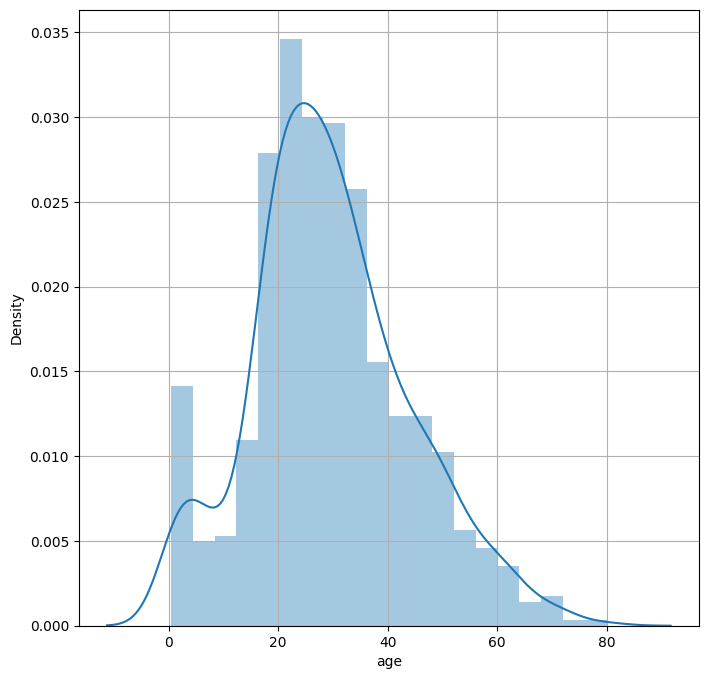

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(titanic['age'])
plt.grid()
plt.show()

In [ ]:
titanic.age.fillna(value = titanic.age.median(), inplace=True)
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# 2. 이상치 처리

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-4-aed3b60b3561>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)]['fare'], axlabel = class_names[i])
<ipython-input-4-aed3b60b3561>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)]['fare'], axlabel = class_names[

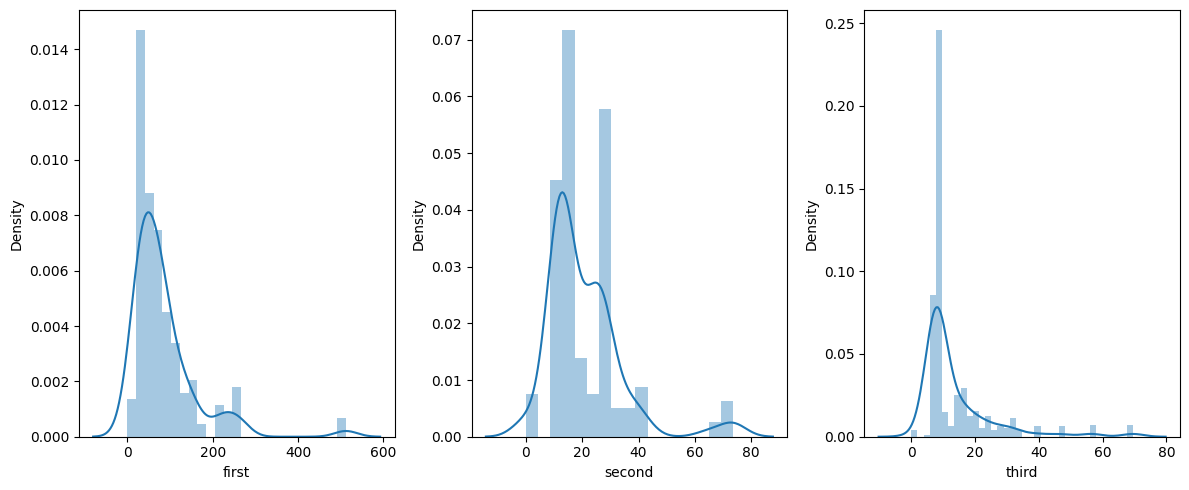

In [ ]:
class_names = ['first', 'second', 'third']
plt.figure(figsize=(12,5))
for i in range(0, 3):
  plt.subplot(1,3,i+1)
  sns.distplot(titanic[titanic.pclass == (i + 1)]['fare'], axlabel = class_names[i])
  plt.tight_layout()

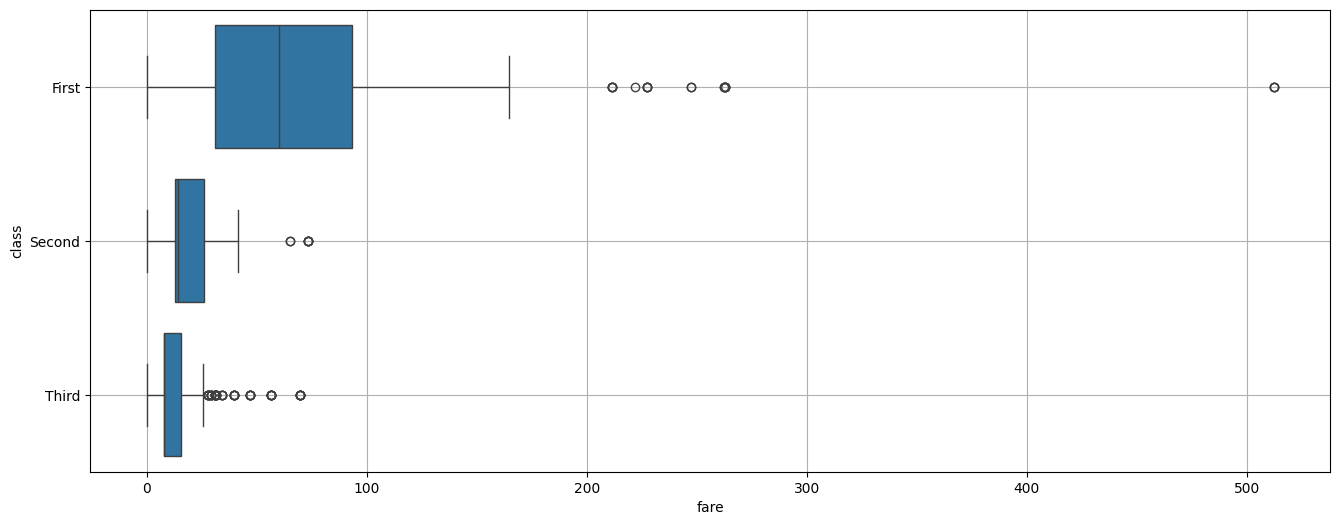

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='fare', y='class', orient='h', data=titanic)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.0% of the points cannot be plac

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


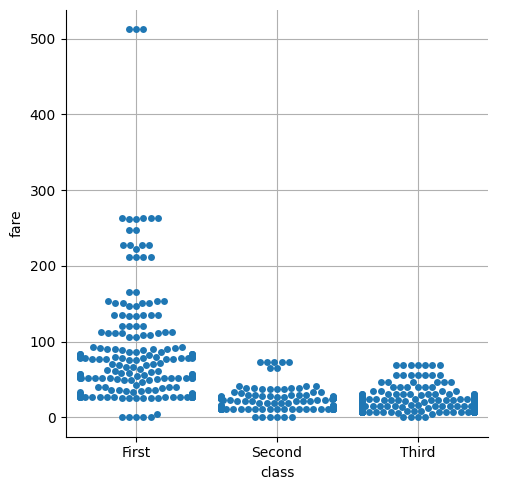

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(x='class', y='fare', kind='swarm', data=titanic)
plt.grid()
plt.show()

In [ ]:
pd.DataFrame(titanic.fare.sort_values(ascending=False).head(10))

,fare
679,512.3292
737,512.3292
258,512.3292
88,263.0000
341,263.0000
27,263.0000
438,263.0000
742,262.3750
311,262.3750
299,247.5208


In [ ]:
pd.DataFrame(titanic.fare.sort_values(ascending=True).head(10))

,fare
815,0.0
822,0.0
481,0.0
466,0.0
263,0.0
633,0.0
271,0.0
413,0.0
597,0.0
732,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.4% of the points cannot be place

<Figure size 800x600 with 0 Axes>

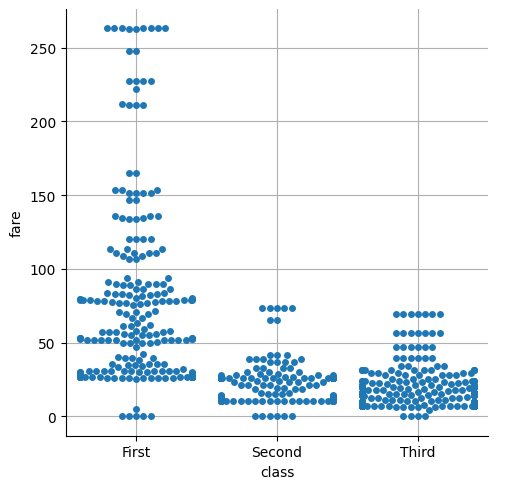

In [ ]:
titanic2 = titanic.copy()

titanic2.loc[titanic2.fare > 512, 'fare'] = 263

plt.figure(figsize=(8, 6))
sns.catplot(x='class', y='fare', kind='swarm', data=titanic2)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.0% of the points cannot be plac

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


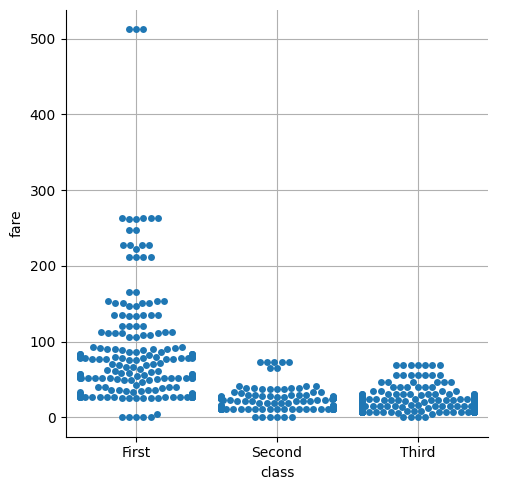

In [ ]:
titanic3 = titanic.copy()

plt.figure(figsize=(8, 6))
sns.catplot(x='class', y='fare', kind='swarm', data=titanic3)
plt.grid()
plt.show()

In [ ]:
def get_bound(series):
    quartile_1, quartile_3 = np.percentile(series, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [ ]:
class_1 = titanic3[titanic3.pclass == 1]['fare']
class_2 = titanic3[titanic3.pclass == 2]['fare']
class_3 = titanic3[titanic3.pclass == 3]['fare']

In [ ]:
class_1_lower, class_1_upper = get_bound(class_1)
class_2_lower, class_2_upper = get_bound(class_2)
class_3_lower, class_3_upper = get_bound(class_3)

In [ ]:
titanic3.loc[(titanic3.pclass == 1) & (titanic3.fare < class_1_lower), 'fare'] = class_1_lower
titanic3.loc[(titanic3.pclass == 1) & (titanic3.fare > class_1_upper), 'fare'] = class_1_upper
titanic3.loc[(titanic3.pclass == 2) & (titanic3.fare < class_2_lower), 'fare'] = class_2_lower
titanic3.loc[(titanic3.pclass == 2) & (titanic3.fare > class_2_upper), 'fare'] = class_2_upper
titanic3.loc[(titanic3.pclass == 3) & (titanic3.fare < class_3_lower), 'fare'] = class_3_lower
titanic3.loc[(titanic3.pclass == 3) & (titanic3.fare > class_3_upper), 'fare'] = class_3_upper

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.4% of the points cannot be place

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


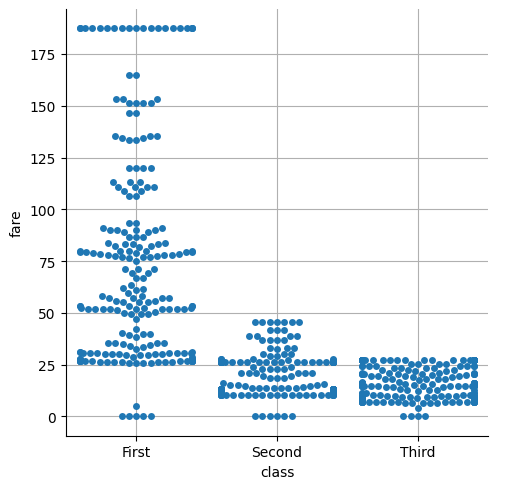

In [ ]:
plt.figure(figsize=(8, 6))
sns.catplot(x='class', y='fare', kind='swarm', data=titanic3)
plt.grid()
plt.show()

In [ ]:
titanic4 = titanic.copy()

class_1_mean = titanic4[titanic4.pclass == 1]['fare'].mean()
class_2_mean = titanic4[titanic4.pclass == 2]['fare'].mean()
class_3_mean = titanic4[titanic4.pclass == 3]['fare'].mean()

titanic4[(titanic4.pclass == 1) & (np.abs(titanic4.fare - class_1_mean) > 3 * titanic4.fare.std())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [ ]:
titanic4[(titanic4.pclass == 2) & (np.abs(titanic4.fare - class_2_mean) > 3 * titanic4.fare.std())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
titanic4[(titanic4.pclass == 3) & (np.abs(titanic4.fare - class_3_mean) > 3 * titanic4.fare.std())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
titanic4 = titanic4[~((titanic4.pclass == 1) & (np.abs(titanic4.fare - class_1_mean) > 3 * titanic4.fare.std()))]
titanic4 = titanic4[~((titanic4.pclass == 2) & (np.abs(titanic4.fare - class_2_mean) > 3 * titanic4.fare.std()))]
titanic4 = titanic4[~((titanic4.pclass == 3) & (np.abs(titanic4.fare - class_3_mean) > 3 * titanic4.fare.std()))]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.3% of the points cannot be place

<Figure size 800x600 with 0 Axes>

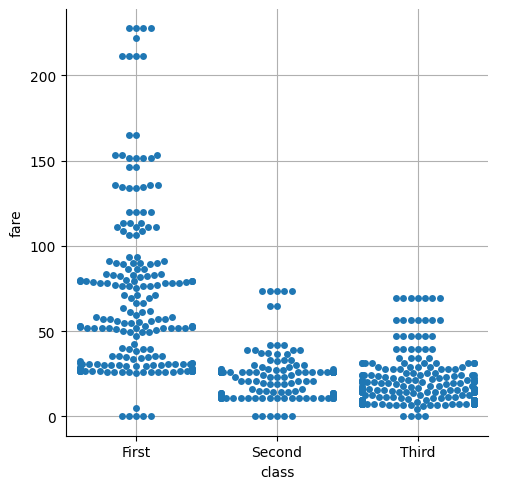

In [ ]:
plt.figure(figsize=(8, 6))
sns.catplot(x='class', y='fare', kind='swarm', data=titanic4)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    sns.distplot(titanic4[titanic4.pclass == (i + 1)]['fare'], axlabel = class_names[i])
plt.tight_layout()
plt.show()

# 3. 데이터 변경

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def draw_distplot(col_name):
    class_names = ['first', 'second', 'third']
    plt.figure(figsize=(12,5))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
    plt.tight_layout()
    plt.show()

<ipython-input-27-2921d8738490>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
<ipython-input-27-2921d8738490>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_

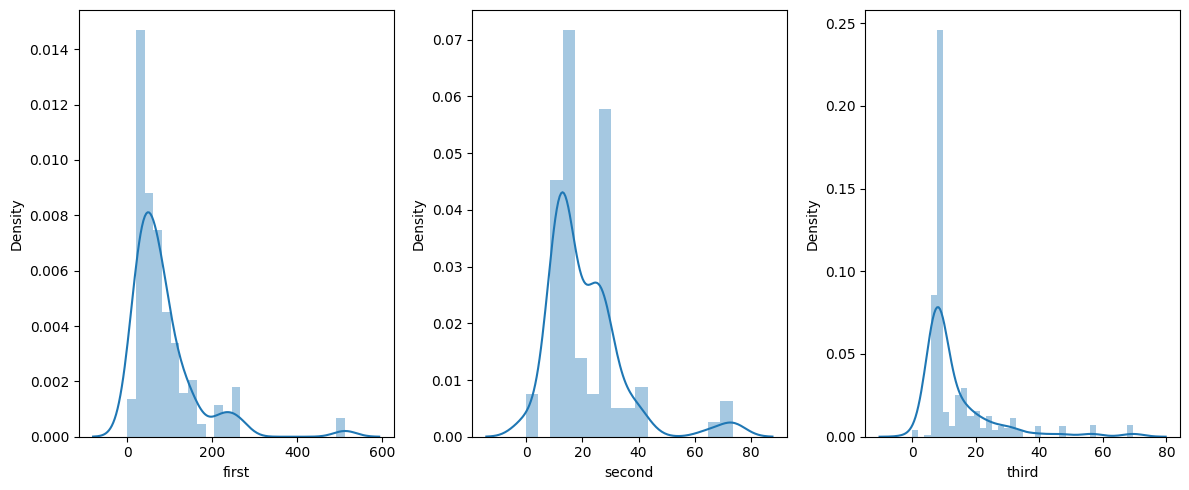

In [ ]:
draw_distplot('fare')

In [ ]:
print('skew : ', round(titanic.fare.skew(), 2))
print('kurtosis : ', round(titanic.fare.kurt(), 2))

skew :  4.79
kurtosis :  33.4


<ipython-input-27-2921d8738490>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
<ipython-input-27-2921d8738490>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_

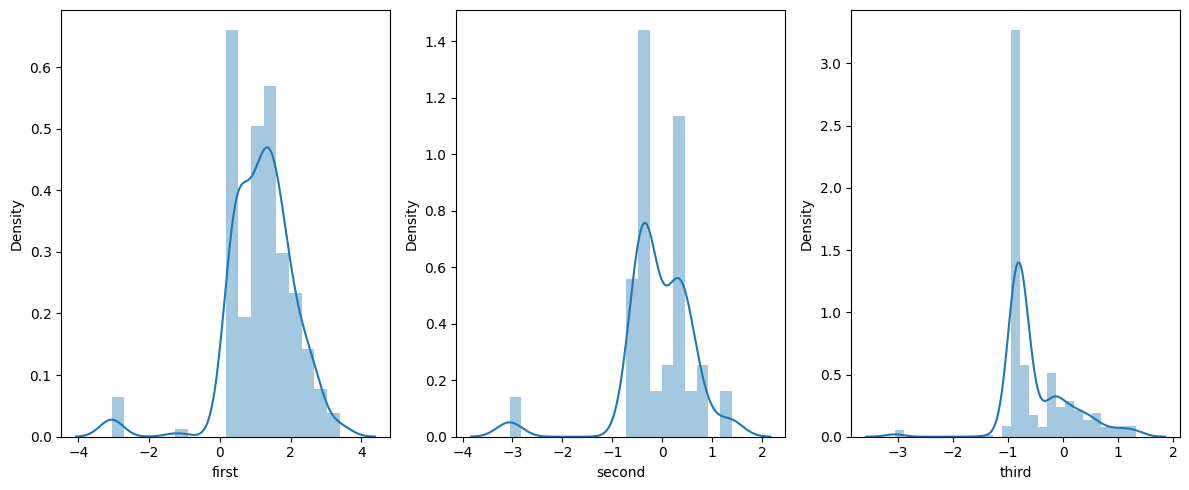

In [ ]:
# sklearn 머신러닝에 주로 쓰이는 라이브러리
from sklearn import preprocessing
titanic['fare_log'] = preprocessing.scale(np.log(titanic.fare+1))
draw_distplot('fare_log')

In [ ]:
print('skew : ', round(titanic.fare_log.skew(), 2))
print('kurtosis : ', round(titanic.fare_log.kurt(), 2))

skew :  0.39
kurtosis :  0.98


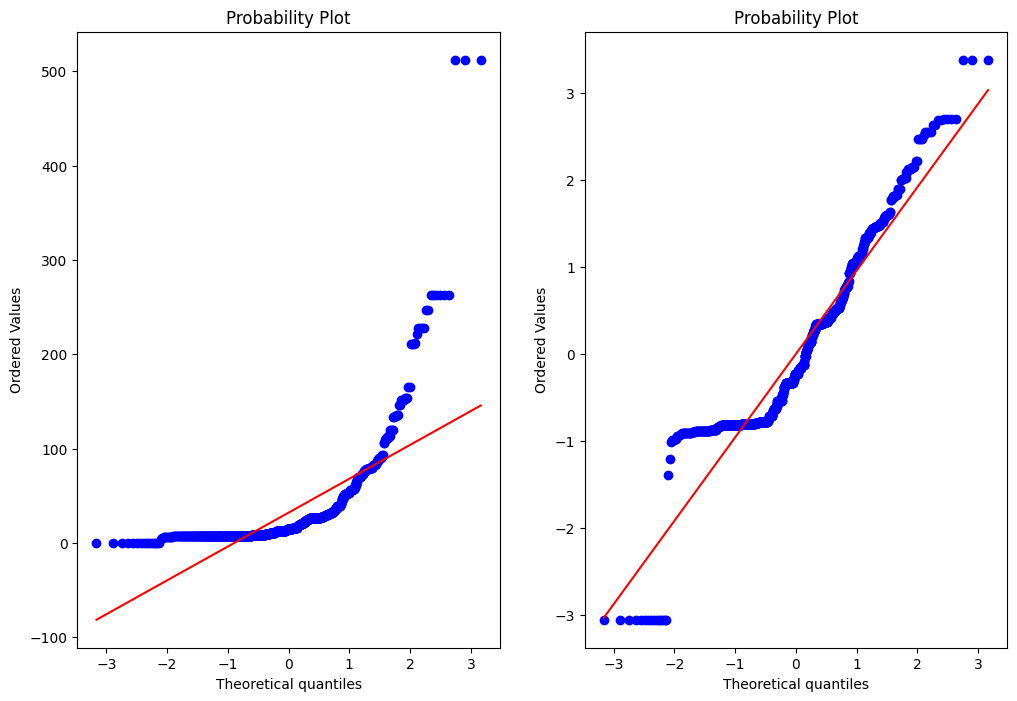

In [ ]:
from scipy import stats

fig = plt.figure(figsize = (12,8))

fig.add_subplot(1,2,1)
res = stats.probplot(titanic['fare'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(titanic['fare_log'], plot=plt)

# 4. 스케일링

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def draw_distplot(col_name):
    plt.figure(figsize=(6, 6))
    sns.distplot(titanic[col_name])
    plt.grid()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

<ipython-input-37-b11bc4931a85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


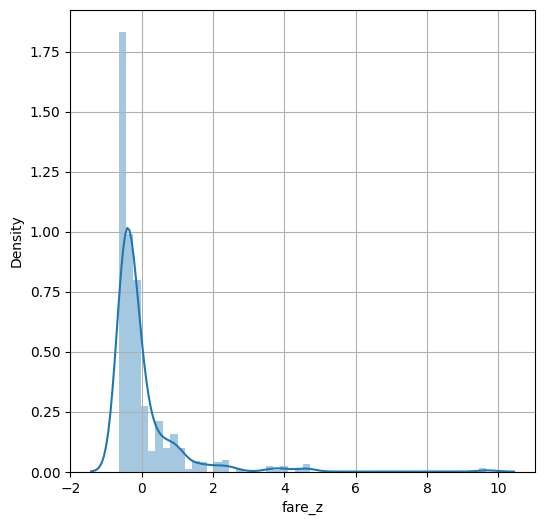

In [ ]:
# np.array(titanic.fare)# np.array(titanic.fare).reshape(-1,1)# np.array(titanic.fare).reshape(-1,1).reshape(-1,)

titanic['fare_z'] = StandardScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
draw_distplot('fare_z')

<ipython-input-37-b11bc4931a85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


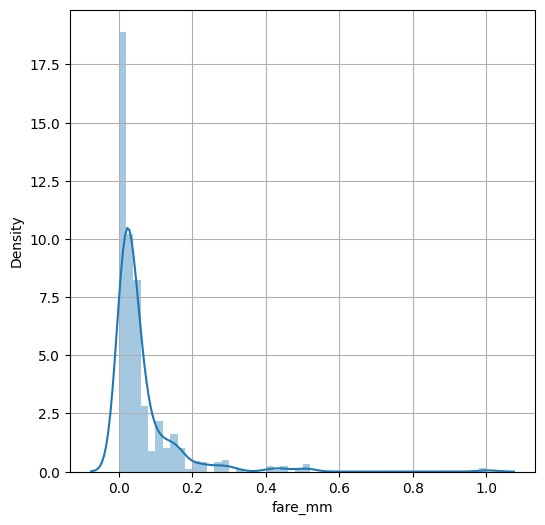

In [ ]:
titanic['fare_mm'] = MinMaxScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
draw_distplot('fare_mm')

<ipython-input-37-b11bc4931a85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


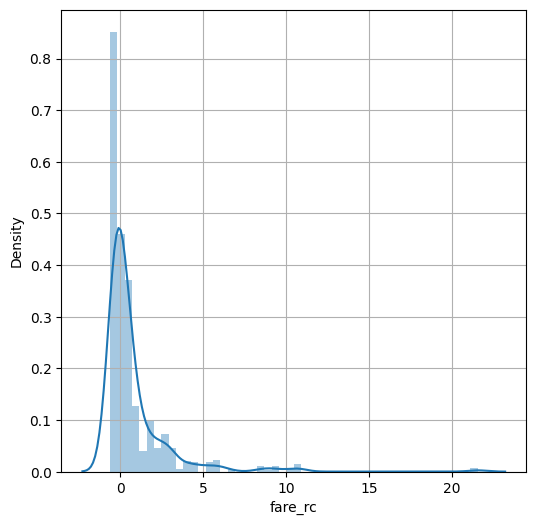

In [ ]:
titanic['fare_rc'] = RobustScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
draw_distplot('fare_rc')

# 5. 피쳐링 및 더미 배리어블

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tips = sns.load_dataset('tips')
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips['per_one_bill'] = round(tips.total_bill / tips['size'], 2)

tips[:10]

,total_bill,tip,sex,smoker,day,time,size,per_one_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39


In [ ]:
tips['per_one_tip'] = round(tips.tip / tips['size'], 2)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,per_one_bill,per_one_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,0.50
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,0.55
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,1.17
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,1.66
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,0.90


In [ ]:
tips['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [ ]:
tips['time'] = tips['time'].map({'Lunch':0, 'Dinner':1})

tips.head()

,total_bill,tip,sex,smoker,day,time,size,per_one_bill,per_one_tip
0,16.99,1.01,Female,No,Sun,1,2,8.49,0.50
1,10.34,1.66,Male,No,Sun,1,3,3.45,0.55
2,21.01,3.50,Male,No,Sun,1,3,7.00,1.17
3,23.68,3.31,Male,No,Sun,1,2,11.84,1.66
4,24.59,3.61,Female,No,Sun,1,4,6.15,0.90


In [ ]:
tips['time'].value_counts()

time
1    176
0     68
Name: count, dtype: int64

In [ ]:
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [ ]:
day_dummy = pd.get_dummies(tips.day)
tips = pd.concat([tips, day_dummy], axis = 1)
tips

,total_bill,tip,sex,smoker,day,time,size,per_one_bill,per_one_tip,Thur,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,1,2,8.49,0.50,False,False,False,True
1,10.34,1.66,Male,No,Sun,1,3,3.45,0.55,False,False,False,True
2,21.01,3.50,Male,No,Sun,1,3,7.00,1.17,False,False,False,True
3,23.68,3.31,Male,No,Sun,1,2,11.84,1.66,False,False,False,True
4,24.59,3.61,Female,No,Sun,1,4,6.15,0.90,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,1,3,9.68,1.97,False,False,True,False
240,27.18,2.00,Female,Yes,Sat,1,2,13.59,1.00,False,False,True,False
241,22.67,2.00,Male,Yes,Sat,1,2,11.34,1.00,False,False,True,False
242,17.82,1.75,Male,No,Sat,1,2,8.91,0.88,False,False,True,False
